In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

2023-11-24 14:09:20.088547: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 14:09:20.088580: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 14:09:20.088617: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 14:09:20.096485: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/scipy/__init__.py:1

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
from tensorflow.keras import datasets, layers, models

In [4]:
import os

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-11-24 14:09:22.158502: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 14:09:22.166258: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 14:09:22.166821: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./Data",
    labels="inferred",
    label_mode="int",
    class_names=["COV", "NORM"],
    batch_size=14, # Prev 32
    image_size=(299, 299),
    shuffle=True,
    seed=42,
)

Found 7232 files belonging to 2 classes.


2023-11-24 14:09:22.379232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 14:09:22.379688: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 14:09:22.380030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
DATASET_SIZE = 518 # Prev 227

train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

In [8]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory="/content/drive/MyDrive/Dataset/Data",
#     labels="inferred",
#     label_mode="int",
#     class_names=["COV", "NORM"],
#     batch_size=32,
#     image_size=(299, 299),
#     shuffle=True,
#     seed=42,
# )

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(299, 299, 3))) # Write 1 instead of 3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu')) # Was 128
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu')) # Was 64
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs=13)

Epoch 1/13


/home/adi/.local/lib/python3.10/site-packages/keras/src/backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-11-24 14:09:40.144323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-24 14:09:40.765440: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-24 14:09:42.141827: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7b7840a810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-24 14:09:42.141853: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecuto

362/362 [==============================] - 41s 98ms/step - loss: 1.0866 - accuracy: 0.5744 - val_loss: 0.6842 - val_accuracy: 0.5396
Epoch 2/13
362/362 [==============================] - 35s 95ms/step - loss: 0.7559 - accuracy: 0.5331 - val_loss: 0.6907 - val_accuracy: 0.5157
Epoch 3/13
362/362 [==============================] - 34s 95ms/step - loss: 0.6944 - accuracy: 0.5239 - val_loss: 0.7028 - val_accuracy: 0.5175
Epoch 4/13
362/362 [==============================] - 34s 95ms/step - loss: 0.6373 - accuracy: 0.6371 - val_loss: 0.5001 - val_accuracy: 0.8122
Epoch 5/13
362/362 [==============================] - 35s 95ms/step - loss: 0.5447 - accuracy: 0.7512 - val_loss: 0.5823 - val_accuracy: 0.6906
Epoch 6/13
362/362 [==============================] - 35s 95ms/step - loss: 0.4797 - accuracy: 0.7849 - val_loss: 0.4222 - val_accuracy: 0.8149
Epoch 7/13
362/362 [==============================] - 34s 95ms/step - loss: 0.3453 - accuracy: 0.8548 - val_loss: 0.2903 - val_accuracy: 0.8803
Epo

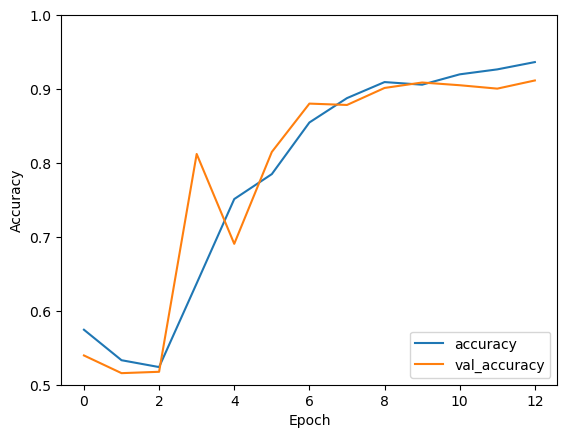

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Accuracy = TP+TN / Total

In [16]:
loss, accuracy= model.evaluate(test_dataset, verbose=2)

print(f'loss = {loss}')
print(f'accuracy = {accuracy}')

77/77 - 3s - loss: 0.2400 - accuracy: 0.8998 - 3s/epoch - 43ms/step
loss = 0.23998504877090454
accuracy = 0.8998144865036011


COVID 19 Dataset
Tiny ML
Tensorflow Lite
Mobile App
Web App
Multiclass classification(Pne, TB)
use CT




In [17]:
PATH = "./Model/model.tflite"
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the model.
with open(PATH, 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpbf61of51/assets


INFO:tensorflow:Assets written to: /tmp/tmpbf61of51/assets
2023-11-24 14:17:53.824548: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-24 14:17:53.824570: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-24 14:17:53.829966: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpbf61of51
2023-11-24 14:17:53.831628: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-24 14:17:53.831641: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpbf61of51
2023-11-24 14:17:53.834300: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-11-24 14:17:53.835481: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-24 14:17:53.980801: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio